## XgboostRegressor

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv('D:/city_hour.csv')

In [52]:
df.shape

(707875, 16)

In [53]:
df=df.dropna()
df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50888,Amaravati,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.10,15.30,117.62,0.30,10.40,0.23,155.0,Moderate
50889,Amaravati,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.10,17.00,136.23,0.28,7.10,0.15,159.0,Moderate
50890,Amaravati,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.10,15.40,149.92,0.20,4.55,0.08,173.0,Moderate
50893,Amaravati,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.10,21.80,161.70,0.10,2.30,0.00,191.0,Moderate
50894,Amaravati,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.10,21.38,161.68,0.10,2.35,0.00,191.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707863,Visakhapatnam,2020-06-30 13:00:00,12.75,45.00,0.55,17.20,9.32,9.12,0.11,10.82,45.80,0.00,0.00,0.00,50.0,Good
707864,Visakhapatnam,2020-06-30 14:00:00,10.75,36.75,1.10,17.75,10.28,4.65,0.34,4.38,50.73,0.00,0.00,0.00,51.0,Satisfactory
707865,Visakhapatnam,2020-06-30 15:00:00,15.75,30.25,0.95,13.75,8.07,4.67,0.30,2.90,41.55,0.00,0.00,0.00,51.0,Satisfactory
707866,Visakhapatnam,2020-06-30 16:00:00,14.00,29.50,1.77,20.70,12.45,8.08,0.45,7.12,39.23,0.00,0.00,0.00,51.0,Satisfactory


In [72]:
pollutants = df.drop(['City','Datetime', 'AQI_Bucket', 'Benzene', 'Toluene', 'Xylene', 'SO2'], axis=1)
pollutants

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,O3,AQI
50888,104.00,148.50,1.93,23.00,13.75,9.80,0.10,117.62,155.0
50889,94.50,142.00,1.33,16.25,9.75,9.65,0.10,136.23,159.0
50890,82.75,126.50,1.47,14.83,9.07,9.70,0.10,149.92,173.0
50893,68.50,117.00,1.35,13.60,8.35,7.40,0.10,161.70,191.0
50894,69.25,112.25,1.52,11.80,7.55,9.25,0.10,161.68,191.0
...,...,...,...,...,...,...,...,...,...
707863,12.75,45.00,0.55,17.20,9.32,9.12,0.11,45.80,50.0
707864,10.75,36.75,1.10,17.75,10.28,4.65,0.34,50.73,51.0
707865,15.75,30.25,0.95,13.75,8.07,4.67,0.30,41.55,51.0
707866,14.00,29.50,1.77,20.70,12.45,8.08,0.45,39.23,51.0


In [74]:
pollutants.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,O3,AQI
PM2.5,1.000000,0.862602,0.505044,0.483286,0.543674,0.527160,0.384705,0.131282,0.813621
PM10,0.862602,1.000000,0.528090,0.559930,0.598298,0.523290,0.366000,0.139196,0.810531
NO,0.505044,0.528090,1.000000,0.481771,0.876283,0.334831,0.290885,-0.118202,0.438119
NO2,0.483286,0.559930,0.481771,1.000000,0.675837,0.333876,0.244073,-0.059074,0.455997
NOx,0.543674,0.598298,0.876283,0.675837,1.000000,0.346283,0.334740,-0.130556,0.511375
NH3,0.527160,0.523290,0.334831,0.333876,0.346283,1.000000,0.395964,0.080119,0.542146
CO,0.384705,0.366000,0.290885,0.244073,0.334740,0.395964,1.000000,-0.020623,0.443803
O3,0.131282,0.139196,-0.118202,-0.059074,-0.130556,0.080119,-0.020623,1.000000,0.261900
AQI,0.813621,0.810531,0.438119,0.455997,0.511375,0.542146,0.443803,0.261900,1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

### Train Test split

In [75]:
selected_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'O3', 'NH3']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pollutants[selected_features], pollutants['AQI'], test_size=0.2, random_state=42)

In [77]:
import xgboost as xgb
#conda install -c ananconda py-xgboost
reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    reg_alpha=0.01
)

In [78]:
reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [79]:
prediction=reg.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [81]:
mse = mean_squared_error(prediction, y_test)
mae = np.mean(np.abs(prediction - y_test))
r2 = r2_score(prediction, y_test)

print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

MSE: 1586.274706673809
MAE: 26.861665893309187
R-squared: 0.7975455175079001


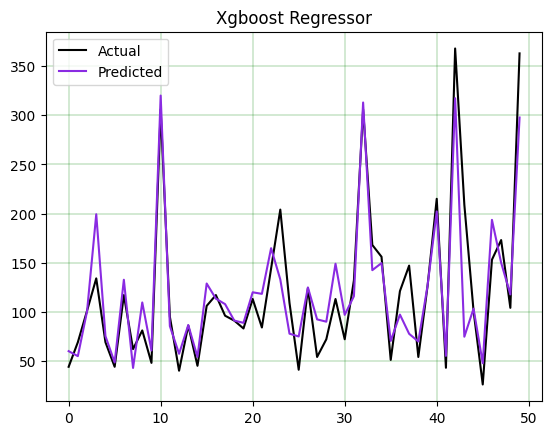

<Figure size 1200x800 with 0 Axes>

In [83]:
y_test_array = y_test[:50]
y_pred_XG = prediction[:50]
df1 = pd.DataFrame({'Actual': y_test_array.ravel(), 'Predicted': y_pred_XG.ravel()})
df1.plot(kind='line', color=['black', 'blueviolet'])
plt.title("Xgboost Regressor")
plt.grid(which='major', linestyle='-', linewidth='0.25', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')
plt.figure(figsize=(12, 8))
plt.show()

In [84]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test_array.ravel()
result["PREDICTED AQI"] = y_pred_XG
result["DIFFERENCE"] = result["PREDICTED AQI"] - result["ACTUAL AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["PREDICTED AQI"] - result["ACTUAL AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(10)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
0,44.0,59.919788,15.919788,36.181337
1,69.0,54.838974,-14.161026,20.523226
2,101.0,100.541046,-0.458954,0.454410
3,134.0,199.270309,65.270309,48.709186
4,69.0,75.233269,6.233269,9.033723
5,44.0,48.392052,4.392052,9.981936
6,117.0,132.596985,15.596985,13.330756
7,62.0,42.847469,-19.152531,30.891179
8,81.0,109.449203,28.449203,35.122473
9,48.0,60.590855,12.590855,26.230947
